# Pymaceuticals_challenge

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Read the mouse data and the study results
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


In [8]:
# Optional: Display all the data for the duplicate mouse ID. 
duplicates.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
clean_data = combined_data.drop(combined_data.loc[combined_data['Mouse ID']=="g989"].index)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].nunique()
clean_mice


248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_data = clean_data.groupby(['Drug Regimen'])
#tumor_vol_stats = regimen_data['Tumor Volume (mm3)'].describe()

tumor_mean = (regimen_data['Tumor Volume (mm3)'].mean())
tumor_median = (regimen_data['Tumor Volume (mm3)'].median())
tumor_var = (regimen_data['Tumor Volume (mm3)'].var())
tumor_stdv = (regimen_data['Tumor Volume (mm3)'].std())
tumor_sem = (regimen_data['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
drug_volume_stats = pd.DataFrame({"Tumor Volume Mean": tumor_mean,
                                 "Tumor Volume Median": tumor_median,
                                 "Tumor Volume Variance": tumor_var,
                                 "Tumor Volume Standard Deviation": tumor_stdv,
                                 "Tumor Volume SEM": tumor_sem})
drug_volume_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
tumor_vol

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements per Drug Regimen')

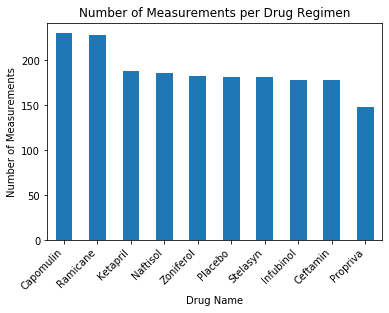

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measurements = clean_data["Drug Regimen"].value_counts()
num_measurements

pandas_bar = num_measurements.plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Drug Name")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements per Drug Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

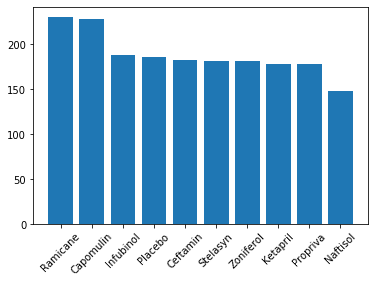

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
num_measurements = clean_data["Drug Regimen"].value_counts()

num_measurements = num_measurements.tolist()
#num_measurements
x_axis = clean_data["Drug Regimen"].unique()
#x_axis

plt.bar(x_axis, num_measurements)
plt.xticks(rotation=45)

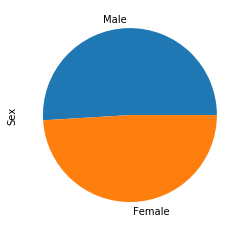

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_f_count = clean_data["Sex"].value_counts()
m_f_pie = m_f_count.plot(kind="pie")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [32]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_final_tv = clean_data.loc[(clean_data["Drug Regimen"]== "Capomulin") | (clean_data["Drug Regimen"]== "Ramicane") | (clean_data["Drug Regimen"]== "Infubinol") | (clean_data["Drug Regimen"]== "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
grp_drugs_df = clean_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume = pd.merge(clean_data, grp_drugs_df, on=["Mouse ID", "Timepoint"])
final_volume


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)
#Make list
four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#empty list brackets
vol_list=[]

## Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in four_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug = final_volume.loc[(final_volume["Drug Regimen"]== x),"Tumor Volume (mm3)"]
    
    # add subset 
    # store final volume "drug" in empty list
    vol_list.append(drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume[]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen